<a href="https://colab.research.google.com/github/vishnuvryeruva/Data-Clean--Pre-process--Visualize/blob/main/CMPE_255_HW(Vishnu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dte

**IMPORTING DATA**

In [ ]:
dt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INvideos.csv")
dt

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...


In [ ]:
dt.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

**FILTERING UNWANTED COLUMNS**

In [ ]:
dtfil=dt[['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'views', 'likes', 'dislikes', 'comment_count']]
dtfil

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,1096327,33966,798,882
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,590101,735,904,0
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,473988,2011,243,149
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,464015,492,293,66
...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3291,404,196
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1726,478,1428
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216,453,697
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,698,115,65


**CHECKING FOR NULL**

In [ ]:
dtfil.isna().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64

In [ ]:
dtfil[dtfil['title'].isna()]

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count


In [ ]:
dtfil.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d3a029550>,
      dtype=object)

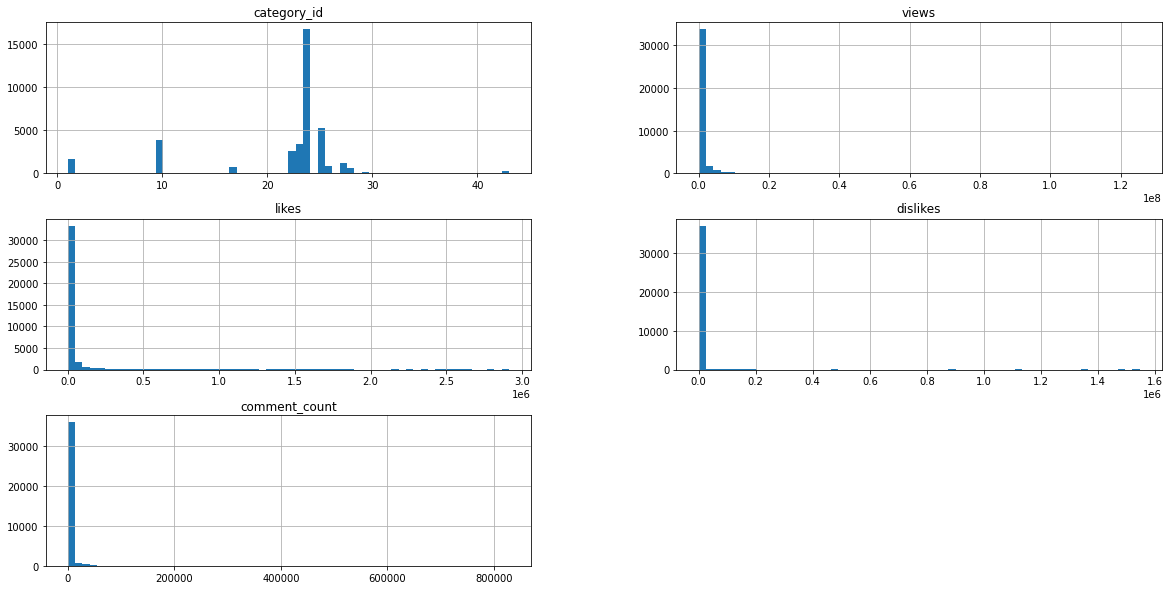

In [ ]:
dtfil.hist(bins=60, figsize=(20,10))

In [ ]:
yttot=dtfil[dtfil['likes']>2.75]
yttot

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,1096327,33966,798,882
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,590101,735,904,0
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,473988,2011,243,149
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,464015,492,293,66
...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3291,404,196
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1726,478,1428
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216,453,697
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,698,115,65


**PLOTTING BEFORE CLEANING**

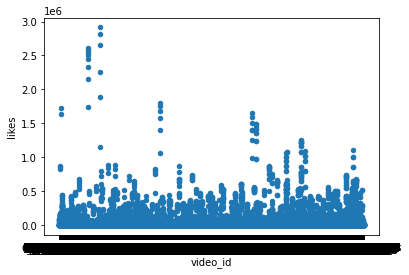

In [ ]:
yttot[['video_id','likes']].plot(kind='scatter',x='video_id',y='likes')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2962 missing from current font.
  font.set_text(s

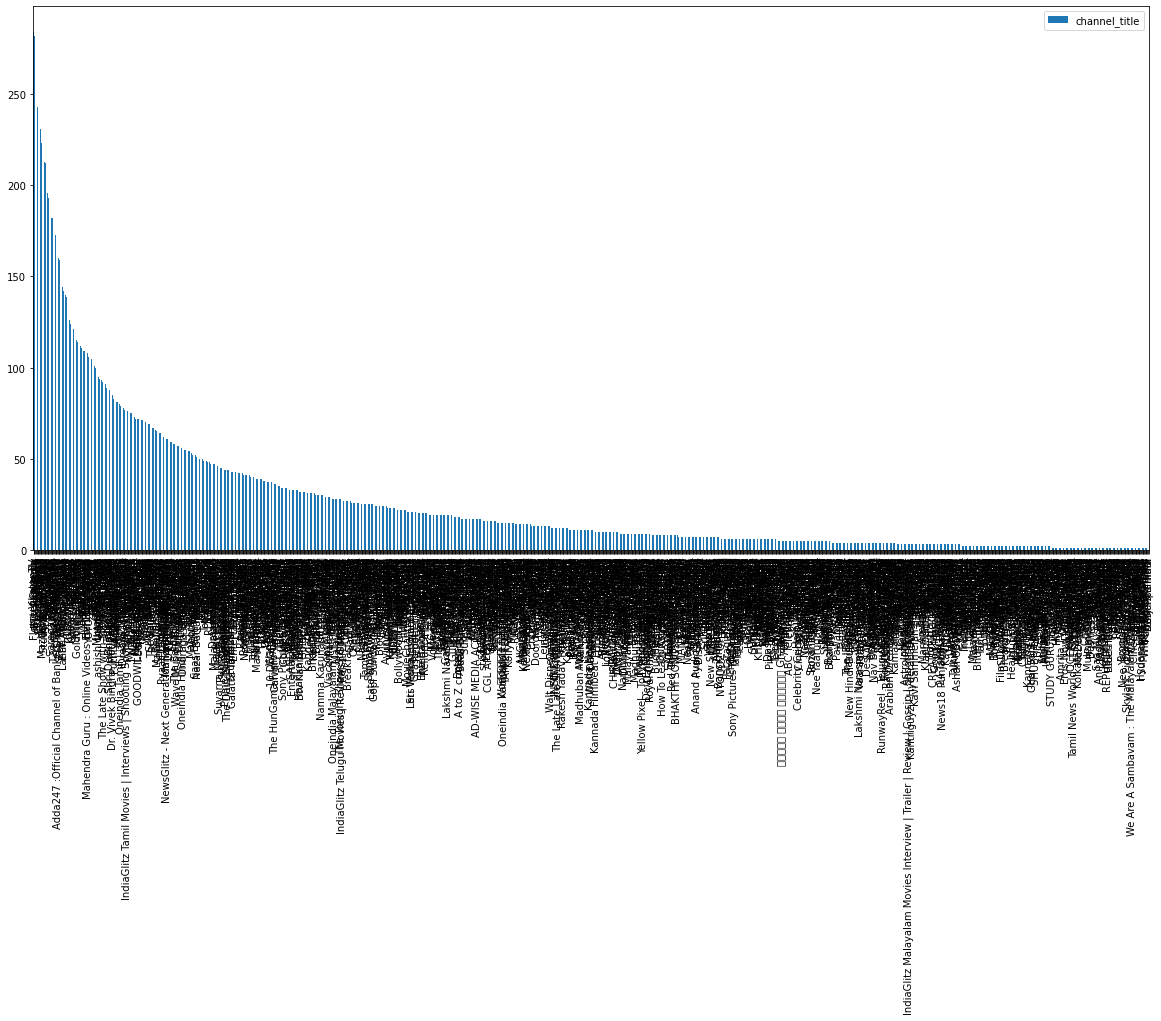

In [ ]:
pd.DataFrame(dtfil['channel_title'].value_counts()).plot(kind='bar', figsize=(20,10))

**CLEANING**

In [ ]:
dtfil[dtfil['likes']<0.5]

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
34,jElRtesCnlA,17.14.11,Breaking News IT Raid - நடந்தது என்ன? சிக்கியத...,Sathiyam News,25,2017-11-13T07:59:26.000Z,33533,0,0,10
36,qP67alYxSiU,17.14.11,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12T03:53:49.000Z,128851,0,0,0
43,q0-SCcsuSSs,17.14.11,Akkineni Nagarjuna Response On Annapurna Studi...,I News,25,2017-11-13T15:30:47.000Z,23932,0,0,7
70,7BUEKSFwk7Q,17.14.11,"Mission IAS 2018 : 13 November, 2017 The Hindu...",only ias,27,2017-11-13T03:13:24.000Z,23114,0,0,0
128,fRY7UWGFvdc,17.14.11,ഇടുക്കി ആശുപത്രിയിൽ രോഗികളെ ക്യൂവിൽ നിർത്തിയ ജ...,Malayalam News Time,22,2017-11-12T11:04:59.000Z,197122,0,0,130
...,...,...,...,...,...,...,...,...,...,...
36833,QEiskdHs8I8,18.11.06,Gangster Sampat Nehra arrested by Haryana poli...,TV9 Telugu,25,2018-06-10T08:51:52.000Z,89609,0,0,80
36950,ihOPILF66Z8,18.12.06,I AM 30 | Sindhu Loknath | V Vikas | Vikram Yo...,SAKKATH STUDIO,24,2018-06-11T02:30:02.000Z,39697,0,0,173
37038,zVtDaUn6iYg,18.13.06,நான் ஆமைக்கறி சாப்பிட்டுருக்கிறேன் - மனம் திறக...,Radio Mirchi Tamil,24,2018-06-12T05:35:35.000Z,154412,0,0,347
37158,zVtDaUn6iYg,18.13.06,நான் ஆமைக்கறி சாப்பிட்டுருக்கிறேன் - மனம் திறக...,Radio Mirchi Tamil,24,2018-06-12T05:35:35.000Z,154412,0,0,347


In [ ]:
dtfil[dtfil['dislikes']>2.0]

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,1096327,33966,798,882
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,590101,735,904,0
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,473988,2011,243,149
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,464015,492,293,66
...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3291,404,196
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1726,478,1428
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216,453,697
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,698,115,65


In [ ]:
dt_legible = dtfil[dtfil['likes']>1]
dt_legible

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,1096327,33966,798,882
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,590101,735,904,0
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,473988,2011,243,149
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,464015,492,293,66
...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3291,404,196
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1726,478,1428
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216,453,697
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,698,115,65


In [ ]:
dt_legible = dt_legible[dt_legible['publish_time'].between('2018','2021')]
dt_legible

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
9253,RF7DhGIQE1k,18.02.01,Zero | Title Announcement | Shah Rukh Khan | A...,Red Chillies Entertainment,24,2018-01-01T11:30:07.000Z,3957090,141811,7280,14900
9254,EnfoA2fF6GY,18.02.01,Naa Peru Surya Naa illu India First Impact || ...,Allu Arjun,1,2018-01-01T11:29:18.000Z,2398555,124005,24907,10637
9258,ZzGidJNb4eI,18.02.01,మద్యంతాగి కారు నడుపుతూ దొరికిపోయిన యాంకర్ ప్రద...,TV5 News,25,2018-01-01T03:44:22.000Z,1285894,3873,1428,615
9259,EhSp7D1ZrBo,18.02.01,Star Anchor Pradeep Caught in Drunk and Drive ...,Film Jalsa,24,2018-01-01T04:14:11.000Z,467836,2315,1024,547
9260,KEodKuZbeAE,18.02.01,Anchor Pradeep caught driving drunk - TV9,TV9 Telugu,25,2018-01-01T07:23:46.000Z,326713,1063,338,403
...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3291,404,196
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1726,478,1428
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216,453,697
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,698,115,65


In [ ]:
dt_mean = dt_legible.groupby('publish_time').mean()
dt_mean

,category_id,views,likes,dislikes,comment_count
publish_time,,,,,
2018-01-01T02:27:36.000Z,25.0,46378.0,56.00,23.00,0.00
2018-01-01T02:37:53.000Z,25.0,103824.0,478.00,68.00,30.00
2018-01-01T03:00:27.000Z,27.0,68969.0,3449.00,40.00,714.00
2018-01-01T03:44:22.000Z,25.0,2149483.5,5410.25,2048.75,392.25
2018-01-01T04:14:11.000Z,24.0,748213.5,3290.00,1428.75,727.75
...,...,...,...,...,...
2018-06-13T16:30:00.000Z,24.0,341799.0,2197.00,329.00,267.00
2018-06-13T17:00:04.000Z,43.0,535254.0,3105.00,1403.00,898.00
2018-06-13T17:30:00.000Z,24.0,86142.0,631.00,129.00,60.00


In [ ]:
dt_legible.groupby('publish_time')['publish_time'].describe()

,count,unique,top,freq
publish_time,,,,
2018-01-01T02:27:36.000Z,1,1,2018-01-01T02:27:36.000Z,1
2018-01-01T02:37:53.000Z,1,1,2018-01-01T02:37:53.000Z,1
2018-01-01T03:00:27.000Z,1,1,2018-01-01T03:00:27.000Z,1
2018-01-01T03:44:22.000Z,4,1,2018-01-01T03:44:22.000Z,4
2018-01-01T04:14:11.000Z,4,1,2018-01-01T04:14:11.000Z,4
...,...,...,...,...
2018-06-13T16:30:00.000Z,2,1,2018-06-13T16:30:00.000Z,2
2018-06-13T17:00:04.000Z,2,1,2018-06-13T17:00:04.000Z,2
2018-06-13T17:30:00.000Z,1,1,2018-06-13T17:30:00.000Z,1


In [ ]:
t = dt_legible.groupby('likes').describe()
t

category_id                  ... comment_count                              
              count  mean std   min  ...           25%       50%       75%       max
likes                                ...                                            
9               1.0  24.0 NaN  24.0  ...           8.0       8.0       8.0       8.0
10              1.0  24.0 NaN  24.0  ...           0.0       0.0       0.0       0.0
11              1.0  24.0 NaN  24.0  ...           2.0       2.0       2.0       2.0
12              1.0  24.0 NaN  24.0  ...           1.0       1.0       1.0       1.0
13              1.0  24.0 NaN  24.0  ...           3.0       3.0       3.0       3.0
...             ...   ...  ..   ...  ...           ...       ...       ...       ...
1592490         1.0  10.0 NaN  10.0  ...      145338.0  145338.0  145338.0  145338.0
1658756         1.0  10.0 NaN  10.0  ...      148548.0  148548.0  148548.0  148548.0
1681448         1.0  10.0 NaN  10.0  ...      141237.0  141237.0  141237.0  141237.0
1752163         1.0  10.0 NaN  10.0  ...      145171.0  145171.0  145171.0  145171.0
1804377         1.0  10.0 NaN  10.0  ...      146917.0  146917.0  146917.0  146917.0

[12877 rows x 32 columns]

In [ ]:
dt_legible['comment_count'].value_counts()

0        666
201      141
13        95
20        95
16        94
        ... 
9696       1
12287      1
2026       1
10206      1
2047       1
Name: comment_count, Length: 5179, dtype: int64

In [ ]:
dt_final = dt_legible[dt_legible['comment_count']>0]
dt_final

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
9253,RF7DhGIQE1k,18.02.01,Zero | Title Announcement | Shah Rukh Khan | A...,Red Chillies Entertainment,24,2018-01-01T11:30:07.000Z,3957090,141811,7280,14900
9254,EnfoA2fF6GY,18.02.01,Naa Peru Surya Naa illu India First Impact || ...,Allu Arjun,1,2018-01-01T11:29:18.000Z,2398555,124005,24907,10637
9258,ZzGidJNb4eI,18.02.01,మద్యంతాగి కారు నడుపుతూ దొరికిపోయిన యాంకర్ ప్రద...,TV5 News,25,2018-01-01T03:44:22.000Z,1285894,3873,1428,615
9259,EhSp7D1ZrBo,18.02.01,Star Anchor Pradeep Caught in Drunk and Drive ...,Film Jalsa,24,2018-01-01T04:14:11.000Z,467836,2315,1024,547
9260,KEodKuZbeAE,18.02.01,Anchor Pradeep caught driving drunk - TV9,TV9 Telugu,25,2018-01-01T07:23:46.000Z,326713,1063,338,403
...,...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3291,404,196
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1726,478,1428
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216,453,697
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,698,115,65


In [ ]:
t = dt_legible.groupby('comment_count').describe()
t

category_id                       ... dislikes                 
                    count       mean       std  ...      50%     75%      max
comment_count                                   ...                          
0                   666.0  22.436937  6.481652  ...    389.0   945.0  30746.0
1                    60.0  23.666667  1.988668  ...     14.0    35.5    248.0
2                    64.0  23.390625  2.952627  ...     17.5    37.0    198.0
3                    68.0  23.397059  2.318902  ...     25.5    44.0    156.0
4                    65.0  23.861538  2.290448  ...     26.0    41.0    282.0
...                   ...        ...       ...  ...      ...     ...      ...
351200                2.0  28.000000  0.000000  ...   5854.0  5854.0   5854.0
367019                2.0  28.000000  0.000000  ...   2257.0  2257.0   2257.0
367354                2.0  28.000000  0.000000  ...   6386.0  6386.0   6386.0
377912                1.0  28.000000       NaN  ...   6780.0  6780.0   6780.0
382685                1.0  28.000000       NaN  ...   2519.0  2519.0   2519.0

[5179 rows x 32 columns]

In [ ]:
dt_mean = dt_final.groupby('comment_count').mean()
dt_mean

,category_id,views,likes,dislikes
comment_count,,,,
1,23.666667,5.410437e+04,193.500000,27.816667
2,23.390625,6.088808e+04,259.625000,32.078125
3,23.397059,6.219841e+04,292.764706,32.764706
4,23.861538,6.172051e+04,298.153846,35.292308
5,23.430769,6.814738e+04,304.261538,33.953846
...,...,...,...,...
351200,28.000000,2.219810e+06,371981.000000,5854.000000
367019,28.000000,1.049339e+06,355742.000000,2257.000000
367354,28.000000,2.469042e+06,390141.000000,6386.000000


In [ ]:
dtf = dt_final.groupby('comment_count')['comment_count'].describe()
dtf

,count,mean,std,min,25%,50%,75%,max
comment_count,,,,,,,,
1,60.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,64.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,68.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4,65.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5,65.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
351200,2.0,351200.0,0.0,351200.0,351200.0,351200.0,351200.0,351200.0
367019,2.0,367019.0,0.0,367019.0,367019.0,367019.0,367019.0,367019.0
367354,2.0,367354.0,0.0,367354.0,367354.0,367354.0,367354.0,367354.0


In [ ]:
dtf = dt_final.groupby('channel_title')['channel_title'].describe()
dtf

,count,unique,top,freq
channel_title,,,,
1 Kg Biriyani,36,1,1 Kg Biriyani,36
1 Minutes news,6,1,1 Minutes news,6
10 DEGREE INDIAN FACTS,21,1,10 DEGREE INDIAN FACTS,21
10TVNewsChannel,11,1,10TVNewsChannel,11
2 Minute News Today,3,1,2 Minute News Today,3
...,...,...,...,...
जय माँ वैष्णो देवी,7,1,जय माँ वैष्णो देवी,7
भक्ति,54,1,भक्ति,54
वास्तु उपाय,2,1,वास्तु उपाय,2


**OUTLIER REMOVAL**

In [ ]:
dt_mean = dt_final.groupby('channel_title').mean()
dt_mean

,category_id,views,likes,dislikes,comment_count
channel_title,,,,,
1 Kg Biriyani,23.000000,186743.166667,10026.305556,795.805556,729.333333
1 Minutes news,25.000000,101183.166667,555.000000,1343.833333,830.333333
10 DEGREE INDIAN FACTS,24.000000,415505.095238,1048.190476,1478.428571,307.714286
10TVNewsChannel,25.000000,508413.454545,2983.181818,1466.545455,1105.909091
2 Minute News Today,24.000000,116039.000000,422.000000,92.666667,68.666667
...,...,...,...,...,...
जय माँ वैष्णो देवी,22.000000,294394.285714,1766.571429,365.285714,59.285714
भक्ति,11.611111,169490.962963,1232.351852,226.759259,124.851852
वास्तु उपाय,22.000000,55543.500000,334.500000,97.500000,11.500000


In [ ]:
stats = dt_final.groupby('channel_title')['likes'].describe().reset_index()[['channel_title','25%','75%']]
stats

,channel_title,25%,75%
0,1 Kg Biriyani,6424.25,14571.00
1,1 Minutes news,486.50,727.50
2,10 DEGREE INDIAN FACTS,232.00,1692.00
3,10TVNewsChannel,140.00,7249.50
4,2 Minute News Today,363.50,501.50
...,...,...,...
1186,जय माँ वैष्णो देवी,1276.50,1856.50
1187,भक्ति,639.75,1655.00
1188,वास्तु उपाय,292.75,376.25
1189,জীবন-সমস্যার সমাধান,7105.00,7105.00


In [ ]:
dt_final = dt_final.merge(stats,on='channel_title',how='left')
dt_final

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,25%,75%
0,RF7DhGIQE1k,18.02.01,Zero | Title Announcement | Shah Rukh Khan | A...,Red Chillies Entertainment,24,2018-01-01T11:30:07.000Z,3957090,141811,7280,14900,228779.25,273486.75
1,EnfoA2fF6GY,18.02.01,Naa Peru Surya Naa illu India First Impact || ...,Allu Arjun,1,2018-01-01T11:29:18.000Z,2398555,124005,24907,10637,131612.50,173751.00
2,ZzGidJNb4eI,18.02.01,మద్యంతాగి కారు నడుపుతూ దొరికిపోయిన యాంకర్ ప్రద...,TV5 News,25,2018-01-01T03:44:22.000Z,1285894,3873,1428,615,616.00,2275.00
3,EhSp7D1ZrBo,18.02.01,Star Anchor Pradeep Caught in Drunk and Drive ...,Film Jalsa,24,2018-01-01T04:14:11.000Z,467836,2315,1024,547,610.00,3394.00
4,KEodKuZbeAE,18.02.01,Anchor Pradeep caught driving drunk - TV9,TV9 Telugu,25,2018-01-01T07:23:46.000Z,326713,1063,338,403,773.00,2822.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26632,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3291,404,196,3379.00,11190.00
26633,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1726,478,1428,288.50,1255.50
26634,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216,453,697,669.00,2470.00
26635,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,698,115,65,276.75,540.00


**MASKING**

In [ ]:
mask = dt_final['likes'] < dt_final['25%']
dt_final.loc[mask,'likes'] = dt_final['25%']

mask = dt_final['likes'] > dt_final['75%']
dt_final.loc[mask,'likes'] = dt_final['75%']

In [ ]:
dt_final

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,25%,75%
0,RF7DhGIQE1k,18.02.01,Zero | Title Announcement | Shah Rukh Khan | A...,Red Chillies Entertainment,24,2018-01-01T11:30:07.000Z,3957090,228779.25,7280,14900,228779.25,273486.75
1,EnfoA2fF6GY,18.02.01,Naa Peru Surya Naa illu India First Impact || ...,Allu Arjun,1,2018-01-01T11:29:18.000Z,2398555,131612.50,24907,10637,131612.50,173751.00
2,ZzGidJNb4eI,18.02.01,మద్యంతాగి కారు నడుపుతూ దొరికిపోయిన యాంకర్ ప్రద...,TV5 News,25,2018-01-01T03:44:22.000Z,1285894,2275.00,1428,615,616.00,2275.00
3,EhSp7D1ZrBo,18.02.01,Star Anchor Pradeep Caught in Drunk and Drive ...,Film Jalsa,24,2018-01-01T04:14:11.000Z,467836,2315.00,1024,547,610.00,3394.00
4,KEodKuZbeAE,18.02.01,Anchor Pradeep caught driving drunk - TV9,TV9 Telugu,25,2018-01-01T07:23:46.000Z,326713,1063.00,338,403,773.00,2822.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26632,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,214378,3379.00,404,196,3379.00,11190.00
26633,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,406828,1255.50,478,1428,288.50,1255.50
26634,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,386319,1216.00,453,697,669.00,2470.00
26635,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,130263,540.00,115,65,276.75,540.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d2143e450>,
      dtype=object)

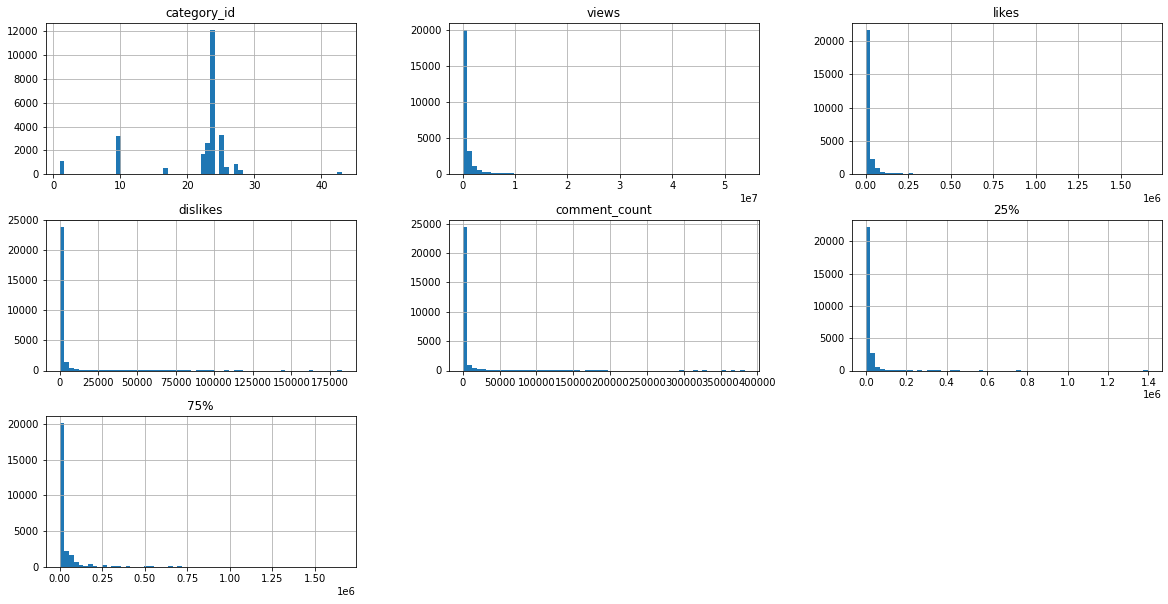

In [ ]:
dt_final.hist(bins=60, figsize=(20,10))

**PLOTTING AFTER CLEANING THE DATA**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2965 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2980 missing from current font.
  font.set_text(s

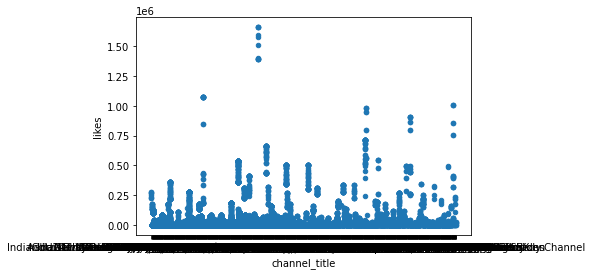

In [ ]:
dt_final[['channel_title','likes']].plot(kind='scatter',x='channel_title',y='likes')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2962 missing from current font.
  font.set_text(s

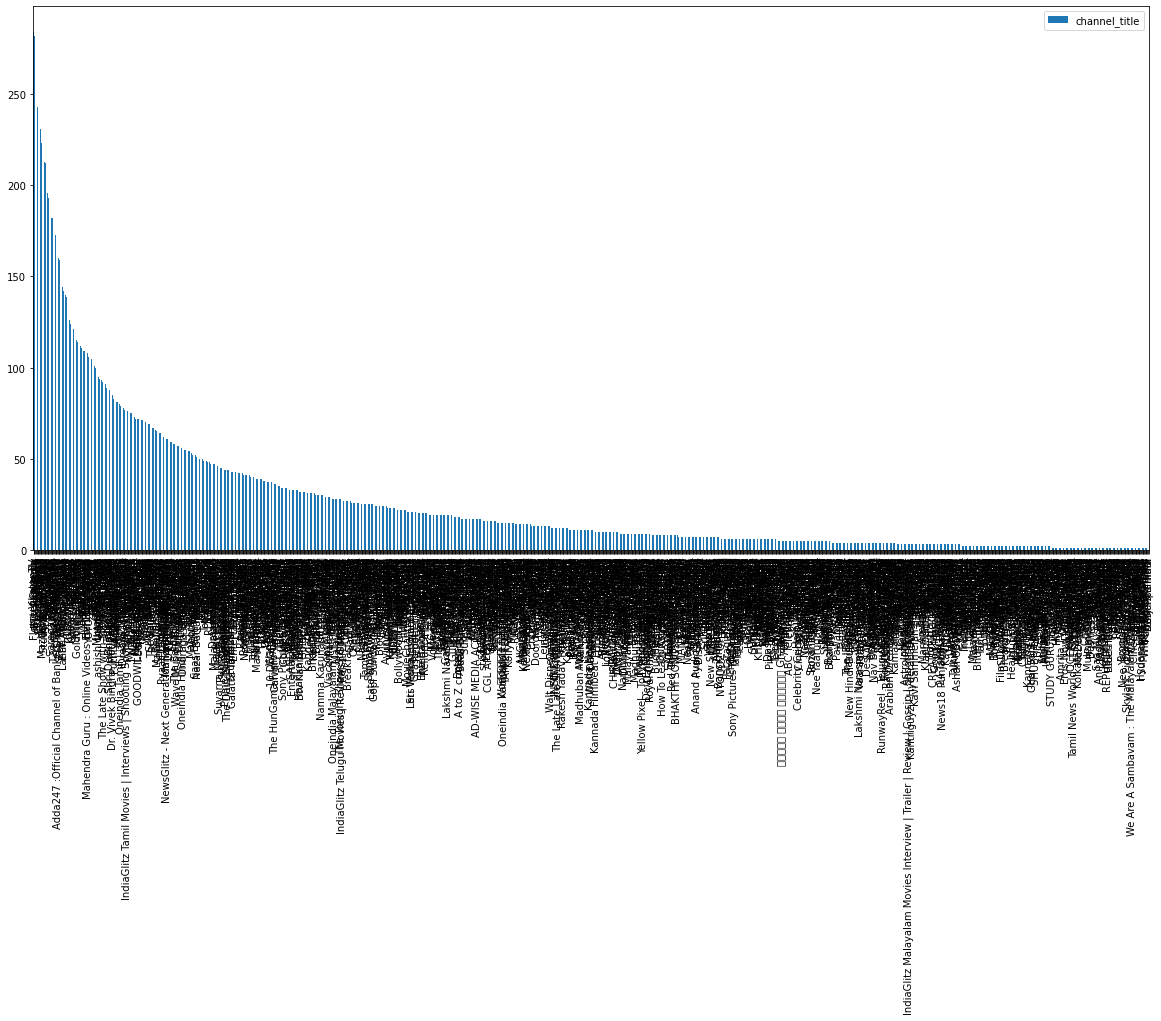

In [ ]:
df = pd.DataFrame(dtfil['channel_title'].value_counts()).plot(kind='bar', figsize=(20,10))
df.xlabel = ('channel')
df

**References:**

1)https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb

2)https://analyticsindiamag.com/10-datasets-for-data-cleaning-practice-for-beginners/

3)https://www.youtube.com/watch?v=OY4eQrekQvs&ab_channel=M%C4%B1sraTurp

4)https://www.youtube.com/watch?v=qxpKCBV60U4&ab_channel=M%C4%B1sraTurp

5)https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/data

6)https://stackoverflow.com/questions/47061798/python-an-integer-is-required-got-type-str

7)https://discourse.jupyter.org/t/custom-filtering-of-rows-based-on-a-single-column/9628

8)https://stackoverflow.com/questions/60780994/defining-functions-to-filter-and-extract-pandas-data-and-plotting-data-on-geopan

9)https://towardsdatascience.com/importing-data-to-google-colab-the-clean-way-5ceef9e9e3c8